In [117]:
%cd /qbio/nest/alpaca/Tutorial

/qbio/nest/alpaca/Tutorial


In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math

In [119]:
#Generating a list that contains data of reads

def makedata(addr):
    print('Start makedata function...')
    with open(addr) as file_data:
        cycle = 0
        result1 = []
        for line in file_data:
            cycle +=1
            if cycle%1000000 == 0:
                print(cycle)
            if line.startswith('@'):
                continue
            else:
                tmp1 = line.split('\t')
                tmp1 = [tmp1[3], tmp1[5], tmp1[9]]
                result1.append(tmp1)                
        
        return result1


In [120]:
def classify(datas):
    result = []
    print('\nstart classify function...')
    
    for i, data in enumerate(datas):
        
        cigarseq = ''
        
        if i%1000000 == 0:
            print(i)
#        print(count)
        #print(i)

        cigar_raw = data[1]
        cigar = []
        seq = data[2]
        tmp = 0
        keys = ['S', 'M', 'D', 'N', 'H', 'I']
        for i in range(len(cigar_raw)):
            if cigar_raw[i] in keys:
                cigar.append(cigar_raw[tmp:i+1])
                tmp = i+1
        #if i<10:
            #print(cigar)
        #print(cigar)
                
        while len(cigar) != 0:
            if cigar[0][-1] == 'M':
                num = 0
                #print(cigar)
                length = int(cigar[0][:-1])
                for j in range(length):
                    cigarseq += 'M'
                    #print(result[keypos])

                del cigar[0]
                
            elif cigar[0][-1] == 'D':      #This means deletion
                num = 0
                #print(cigar)
                #print(cigar[0][:-1])
                length = int(cigar[0][:-1])

                #print(length)
                for j in range(length):
                    cigarseq += 'D'
                    #print(result[keypos])
                del cigar[0]
                
            elif cigar[0][-1] == 'S' or cigar[0][-1] == 'N':   #This means soft clipping
                del cigar[0]
                #print(cigar)
            
            elif cigar[0][-1] == 'I':                          #This means insertion
                num = 0
                length = int(cigar[0][:-1])
                for j in range(length):
                    cigarseq += 'I'
                del cigar[0]
            
            else:
                print('exception')
                return []
    #print(result)
        result.append(cigarseq)
    return result
        

            
        
        

RNA_seq_classified_sampled = classify(RNA_seq_sampled)
CLIP_35L33G_classified_sampled = classify(CLIP_35L33G_sampled)
CLIP_2J3_classified_sampled = classify(CLIP_2J3_sampled)
CLIP_polyclonal_classified_sampled = classify(CLIP_polyclonal_sampled)

#print(RNA_seq_classified)
count = 0
for i in range(10000):
    print(RNA_seq_classified[i])

In [121]:
def binning1(data, binnum):
    print('\nstart binning function...')
    cycle = 0
    result = []
    for i in range(binnum):
        result.append([])
    #print(len(data))
    for line in data:
        cycle +=1
        if cycle%1000000 == 0:
            print(cycle)
        #print(line)
        length = len(line)
        #print(length)
        r = length%binnum
        q = int(length/binnum)
        step = []
        count = 0
        pos = 0
        for i in range(binnum):
            if count != r:
                chunk = line[pos:pos+q+1]
                result[i] += [char for char in chunk]
                pos += q+1
                count += 1
            else:
                chunk = line[pos:pos+q]
                result[i] += [char for char in chunk]
                pos += q
    return result
        #print(step)

In [130]:
def binning2(data, binnum):
    print('\nstart binning function...')
    cycle = 0
    result = []
    for i in range(binnum):
        result.append([])
    #print(len(data))
    for line in data:
        cycle +=1
        if cycle%1000000 == 0:
            print(cycle)
        #print(line)
        length = len(line)
        #print(length)
        r = length%binnum
        q = int(length/binnum)
        step = []
        count = 0
        pos = 0
        for i in range(binnum):
            if count != r:
                chunk = line[pos:pos+q+1]
                if 'D' in chunk:
                    if 'I' in chunk:
                        result[i] += 'B'
                    else:
                        result[i] += 'D'
                
                else:
                    if 'I' in chunk:
                        result[i] += 'I'
                    else:
                        result[i] += 'M'
                pos += q+1
                count += 1
            else:
                chunk = line[pos:pos+q]
                if 'D' in chunk:
                    if 'I' in chunk:
                        result[i] += 'B'
                    else:
                        result[i] += 'D'
                
                else:
                    if 'I' in chunk:
                        result[i] += 'I'
                    else:
                        result[i] += 'M'
                pos += q
    return result
        #print(step)

In [131]:
#For test
res = binning2(['MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM', 'MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMDDDDDIDDDDMMMMMMMMMMMMMMMMMMMM'], 20)
print(res)


start binning function...
[['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'D'], ['M', 'B'], ['M', 'D'], ['M', 'D'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M'], ['M', 'M']]


In [124]:
#plot figures S2C
def plot(data, name, binnum):
    print('\nstart plotting...')
    Dlist = []
    Ilist = []
    
    for cigars in data:
        x = list(range(1, binnum+1))
        length = len(cigars)
        D = 0
        I = 0
        
        for cigar in cigars:
            if cigar == 'D':
                D += 1
            elif cigar == 'I':
                I += 1
        #print(length, D, I)
        Dlist.append(D/length*100)
        Ilist.append(I/length*100)
    #print(Dlist)
    plt.plot(x, Dlist, color='blue')
    plt.plot(x, Ilist, color='red')
    plt.title(name + '\n\nPosition in tag')
    plt.ylabel('Frequency (percent)')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    plt.show()
    


start plotting...


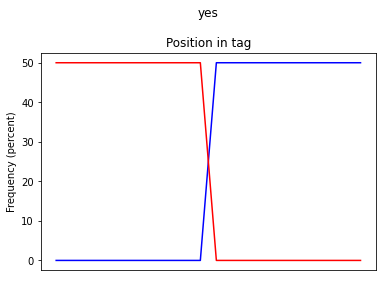

In [125]:
#For test
plot(['MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MD', 'MD', 'MD', 'MD', 'MD', 'MD', 'MD', 'MD', 'MD', 'MD'], 'yes', 20)

In [132]:
def main(addr, name, binnum):
    pre = makedata(addr)
    print("Success!")
    classified = classify(pre)
    print("Success!")
    binned = binning2(classified, binnum)
    print("Success!")
    plot(binned, name, binnum)
    print("Success!")
    

Start makedata function...
1000000
2000000
3000000
4000000
5000000
6000000
Success!

start classify function...
0
1000000
2000000
3000000
4000000
5000000
6000000
Success!

start binning function...
1000000
2000000
3000000
4000000
5000000
6000000
Success!

start plotting...


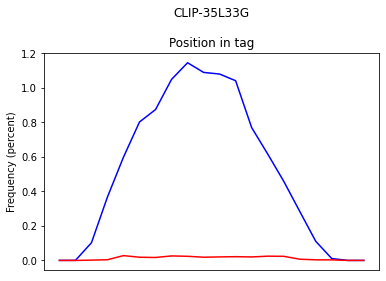

Success!


In [133]:
main('./AlignedData_with_genome/Lin28a-CLIP-35L33G/Aligned.out.sam', 'CLIP-35L33G', 20)

Start makedata function...
1000000
2000000
3000000
4000000
5000000
6000000
Success!

start classify function...
0
1000000
2000000
3000000
4000000
5000000
6000000
Success!

start binning function...
1000000
2000000
3000000
4000000
5000000
6000000
Success!

start plotting...


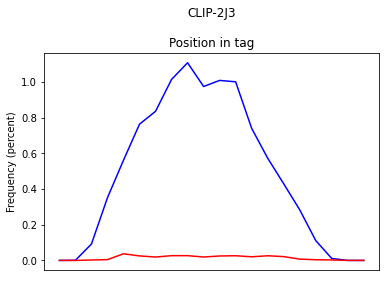

Success!


In [136]:
main('./AlignedData_with_genome/Lin28a-CLIP-2J3/Aligned.out.sam', 'CLIP-2J3', 20)

Start makedata function...
1000000
2000000
3000000
4000000
5000000
Success!

start classify function...
0
1000000
2000000
3000000
4000000
5000000
Success!

start binning function...
1000000
2000000
3000000
4000000
5000000
Success!

start plotting...


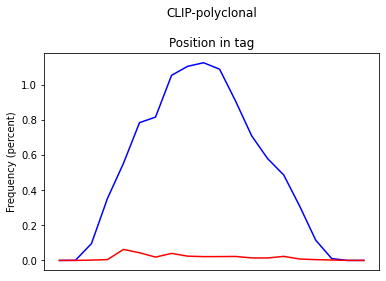

Success!


In [137]:
main('./AlignedData_with_genome/Lin28a-CLIP-polyclonal/Aligned.out.sam', 'CLIP-polyclonal', 20)

Start makedata function...
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
Success!

start classify function...
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
Success!

start binning function...
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
Success!

start plotting...


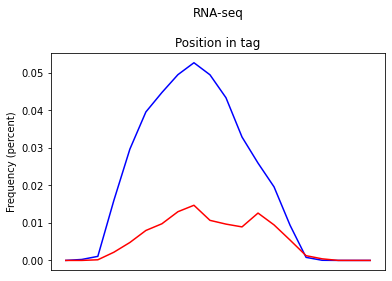

Success!


In [138]:
main('./AlignedData_with_genome/RNA-seq-untreated/Aligned.out.sam', 'RNA-seq', 20)